필수알고리즘with파이썬_7
================

# LESSON 07 트리(Tree)의 순회(Traverse) 알고리즘
7.1 트리 순회 알고리즘의 종류  
7.2 전위 순회(Pre-Order Traverse) 알고리즘  
7.3 중위 순회(In-Order Traverse) 알고리즘  
7.4 후위 순회(Post-Order Traverse) 알고리즘  
7.5 단계 순회(Level-Order Traverse) 알고리즘  
7.6 전체 코드   
7.7 정리


## 7.1 트리 순회 알고리즘의 종류


- 트리 구조는 다른 자료 구조보다 자료를 저장하거나 검색하는 등의 방법이 간단하여 메모리를 효율적으로 사용한다.
- 트리 구조에서 사용하는 트리 순회 알고리즘은 다음과 같이 4가지 알고리즘이 존재한다.


1. 전위 순회(Pre-Order Traverse)
2. 중위 순회(In-Order Traverse)
3. 후위 순회(Post-Order Traverse)
4. 단계 순위 순회(Level-Order Traverse)

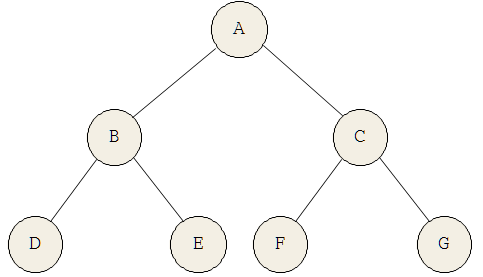

1. 전위 순회는 A -> B -> D -> E -> C -> F -> G의 순서로 방문하게 된다.
2. 중위 순회는 D -> B -> E -> A -> F -> C -> G의 순서로 방문하게 된다.
3. 후위 순회는 D -> E -> B -> F -> G -> C -> A의 순서로 방문하게 된다.
4. 단계 순위 순회는 A -> B -> C -> D -> E -> F -> G의 순서로 방문하게 된다.


- 먼저 트리 구조에서 사용할 노드에 대한 자료형을 만들어야 한다.

In [1]:
## 노드 클래스
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

In [2]:
## 그림과 같은 초기 트리 구성 함수
def init_tree():
    global root
    
    new_node = Node("A")
    root = new_node
    new_node = Node("B")
    root.left = new_node
    new_node = Node("C")
    root.right = new_node
    
    node = root.left
    new_node = Node("D")
    node.left = new_node
    new_node = Node("E")
    node.right = new_node
    
    node = root.right
    new_node = Node("F")
    node.left = new_node
    new_node = Node("G")
    node.right = new_node

- 이제 각각의 트리 순회 알고리즘의 구체적인 사용 방법과 차이점에 대해서 알아보자.

## 7.2 전위 순회(Pre-Order Traverse) 알고리즘


- 트리 구조를 순회하기 위해 반드시 지켜야 할 기본적인 규칙은 "노드는 오직 한번만 방문한다"이다. 트리 구조에서 트리 구조를 순회나는 방법에는 가운데 노드를 몬저 방문하고 그 다음에는 왼쪽 노드를 방문하고 그리고 나서 오른쪽 노드를 방문하는 방법이다.

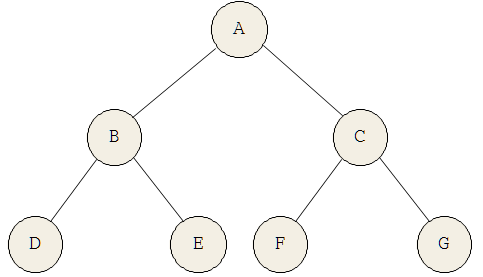

1. __전위 순회는 A -> B -> D -> E -> C -> F -> G의 순서로 방문하게 된다.__
2. 중위 순회는 D -> B -> E -> A -> F -> C -> G의 순서로 방문하게 된다.
3. 후위 순회는 D -> E -> B -> F -> G -> C -> A의 순서로 방문하게 된다.
4. 단계 순위 순회는 A -> B -> C -> D -> E -> F -> G의 순서로 방문하게 된다.

- 전위 순회, 중위 순회, 후위 순회 알고리즘은 스택을 사용하고 단계 순위 순회 알고리즘은 큐를 사용한다.

제너레이터를 쓰지 않고 객체로 출력하기

In [3]:
def preorder_traverse(node, container=[]):    
    if node == None: return
    container.append(node.data)
    preorder_traverse(node.left, container)
    preorder_traverse(node.right, container)
    return container

yield를 이용해서 제너레이터로 출력하기

In [4]:
def preorder_traverse(node):    
    if node == None: return
    yield node.data
    yield from preorder_traverse(node.left)
    yield from preorder_traverse(node.right)

In [5]:
init_tree()
for i in preorder_traverse(root):
    print(i)

A
B
D
E
C
F
G


#  기회가 됐으니 제너레이터 사용 방법을 배워보자!(generator)  
참고 사이트 https://dojang.io/mod/page/view.php?id=2412  

제너레이터(generator)는 이터레이터(iterator)를 생성해주는 함수이다. 제너레이터는 함수 안에서 yield라는 키워드만 사용하면 된다(yield라는 키워드가 하나라도 있으면 제너레이터가 된다).   

In [6]:
def number_generator():
    yield 0
    yield 1
    yield 2
    
for i in number_generator():
    print(i)

0
1
2


### yield의 동작 과정 알아보기

In [7]:
def number_generator():
    yield 0 # 0을 함수 바깥으로 전달하면서 코드 실행을 함수 바깥에 양보
    yield 1 # 1을 함수 바깥으로 전달하면서 코드 실행을 함수 바깥에 양보
    yield 2 # 2을 함수 바깥으로 전달하면서 코드 실행을 함수 바깥에 양보
    
g = number_generator()

a = next(g)
print(a)

b = next(g)
print(b)

c = next(g)
print(c)

0
1
2


참고사이트에 정말 좋은 그림이 있었다.

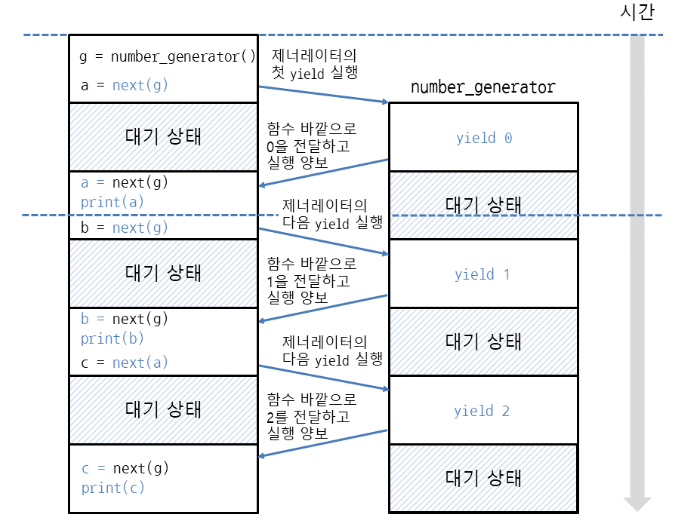

그림을 보게 되면 yield의 동작원리를 쉽게 알 수 있다.  
~~~
a = next(g)
~~~ 
가 실행되면 g에서 첫 yield를 실행하고 g는 대기상태가 된다.
그 후에 함수 바깥으로 0을 전달하고 실행을 양보한다.  
그렇게 되면서 print(a)가 동작 할 수 있고, b=next(g)가 동작할 수 있게 된다.  
~~~
b = nex(g)
~~~
가 실행되면 함수는 대기 상태에서 yield 0 이후 코드를 실행한다.

같은 방식으로 계속 진행되는 것을 볼 수 있다.

### 제너레이터 만들기

In [8]:
def number_generator(stop):
    n = 0
    while n < stop:
        yield n
        n += 1
        
for i in  number_generator(3):
    print(i)

0
1
2


이 경우는 함수 안에서  n = 0가 선언된 이후에 while문에 들어가지만 동작 원리는 위와 같다.  
~~~
for i in number_generator(3):
    print(i)
~~~
가 실행되면 number_generator(3)이 실행된다. 
- 그러면 n = 0이 선언된 후에 while문에 진입하고 yield n 이 실행된다. 
- 그 후에 number_generator()를 빠져나오고, i에 n이 입력되고 print(i)를 만나 0이 출력된다. 
- 그 후 for문을 다시 들어가서 number_generator()에 yield n 다음 코드가 실행된다. 
- 그러면 n = 1이 되고 while문 안으로 다시 들어간다.

### yield에서 함수 호출하기

In [9]:
def upper_generator(x):
    for i in x:
        yield i.upper()
        
fruits = ['apple','pear','grape','pineapple','orange']
for i in upper_generator(fruits):
    print(i)

APPLE
PEAR
GRAPE
PINEAPPLE
ORANGE


yield안에 함수를 넣어도 된다.

### yield from으로 값을 여러 번 바깥으로 전달하기
지금까지 값을 여러 번 바깥으로 전달할 떄는 for 또는 while 반복문으로 반복하면서 yield를 사용했다.

In [10]:
def upper_generator(x):
    for i in x:
        yield i.upper()
        
fruits = ['apple','pear','grape','pineapple','orange']
for i in upper_generator(fruits):
    print(i)

APPLE
PEAR
GRAPE
PINEAPPLE
ORANGE


이런 경우에는 매번 반복문을 사용하지 않고, yield from을 사용한다. yield from에는 반복 가능한 객체, 이터레이터, 제너레이터 객체를 지정한다(파이썬 3.3 이상부터 사용 가능).  
- yield from 반복가능한 객체
- yield from 이터레이터
- yield from 제너레이터 객체

In [11]:
def upper_generator(x):
    x = list(map(lambda x: x.upper(), x))
    yield from x
        
fruits = ['apple','pear','grape','pineapple','orange']
for i in upper_generator(fruits):
    print(i)

APPLE
PEAR
GRAPE
PINEAPPLE
ORANGE


yield from에 제너레이터 객체 지정하기

In [12]:
def number_generator(stop):
    n = 0
    while n < stop:
        yield n
        n += 1
    
def three_generator():
    yield from number_generator(3)
    
for i in three_generator():
    print(i)

0
1
2


## 7.3 중위 순회(In-Order Traverse) 알고리즘


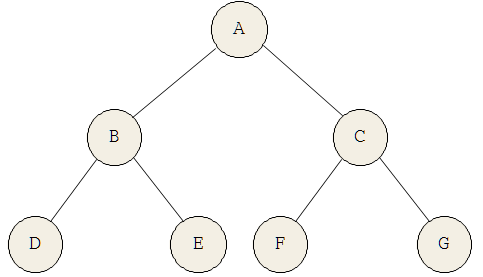

1. 전위 순회는 A -> B -> D -> E -> C -> F -> G의 순서로 방문하게 된다.
2. __중위 순회는 D -> B -> E -> A -> F -> C -> G의 순서로 방문하게 된다.__
3. 후위 순회는 D -> E -> B -> F -> G -> C -> A의 순서로 방문하게 된다.
4. 단계 순위 순회는 A -> B -> C -> D -> E -> F -> G의 순서로 방문하게 된다.

In [13]:
def inorder_traverse(node):
    if node == None: return
    yield from inorder_traverse(node.left)
    yield node.data
    yield from inorder_traverse(node.right)

In [14]:
init_tree()
for i in inorder_traverse(root):
    print(i)

D
B
E
A
F
C
G


## 7.4 후위 순회(Post-Order Traverse) 알고리즘


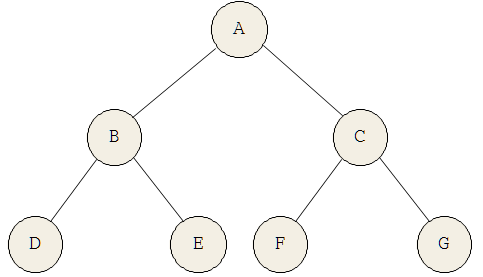

1. 전위 순회는 A -> B -> D -> E -> C -> F -> G의 순서로 방문하게 된다.
2. 중위 순회는 D -> B -> E -> A -> F -> C -> G의 순서로 방문하게 된다.
3. __후위 순회는 D -> E -> B -> F -> G -> C -> A의 순서로 방문하게 된다.__
4. 단계 순위 순회는 A -> B -> C -> D -> E -> F -> G의 순서로 방문하게 된다.

In [15]:
def postorder_traverse(node):
    if node == None: return
    yield from postorder_traverse(node.left)
    yield from postorder_traverse(node.right)
    yield node.data

In [16]:
init_tree()
for i in postorder_traverse(root):
    print(i)

D
E
B
F
G
C
A


## 7.5 단계 순회(Level-Order Traverse) 알고리즘


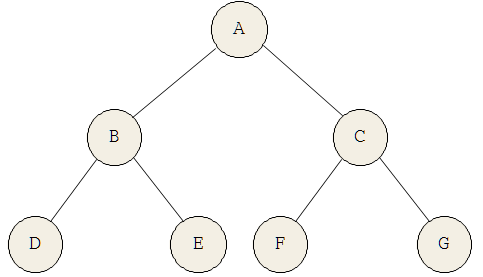

1. 전위 순회는 A -> B -> D -> E -> C -> F -> G의 순서로 방문하게 된다.
2. 중위 순회는 D -> B -> E -> A -> F -> C -> G의 순서로 방문하게 된다.
3. 후위 순회는 D -> E -> B -> F -> G -> C -> A의 순서로 방문하게 된다.
4. __단계 순위 순회는 A -> B -> C -> D -> E -> F -> G의 순서로 방문하게 된다.__

- 단계 순위 순회 알고리즘은 위에서부터 왼쪽, 오른쪽 순서로 차례대로 방문하며 출력하기 때문에 스택보다는 큐를 사용하는 것이 더 바람직하다.

In [17]:
levelq = []

def levelorder_traverse(node):
    global levelq
    levelq.append(node)
    while len(levelq) != 0:
        # visit
        visit_node = levelq.pop(0)
        yield visit_node.data
        # chilld put
        if visit_node.left != None:
            levelq.append(visit_node.left)
        if visit_node.left != None:
            levelq.append(visit_node.right)

In [18]:
init_tree()
for i in levelorder_traverse(root):
    print(i)

A
B
C
D
E
F
G


## 7.6 전체 코드


In [19]:
## 노드 클래스
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        
## 초기 트리 구성 함수
def init_tree():
    global root
    
    new_node = Node("A")
    root = new_node
    new_node = Node("B")
    root.left = new_node
    new_node = Node("C")
    root.right = new_node
    
    node = root.left
    new_node = Node("D")
    node.left = new_node
    new_node = Node("E")
    node.right = new_node
    
    node = root.right
    new_node = Node("F")
    node.left = new_node
    new_node = Node("G")
    node.right = new_node
    
    
def preorder_traverse(node):    
    if node == None: return
    yield node.data
    yield from preorder_traverse(node.left)
    yield from preorder_traverse(node.right)
    
def inorder_traverse(node):
    if node == None: return
    yield from inorder_traverse(node.left)
    yield node.data
    yield from inorder_traverse(node.right)
    
def postorder_traverse(node):
    if node == None: return
    yield from postorder_traverse(node.left)
    yield from postorder_traverse(node.right)
    yield node.data
    
levelq = []

def levelorder_traverse(node):
    global levelq
    levelq.append(node)
    while len(levelq) != 0:
        # visit
        visit_node = levelq.pop(0)
        yield visit_node.data
        # chilld put
        if visit_node.left != None:
            levelq.append(visit_node.left)
        if visit_node.left != None:
            levelq.append(visit_node.right)

In [20]:
print("<Preorder Traverse>")
for i in preorder_traverse(root):
    print(i)

print("<Inorder Traverse>")
for i in inorder_traverse(root):
    print(i)

print("<Postorder Traverse>")
for i in postorder_traverse(root):
    print(i)

print("<Levelorder Traverse>")
for i in levelorder_traverse(root):
    print(i)


<Preorder Traverse>
A
B
D
E
C
F
G
<Inorder Traverse>
D
B
E
A
F
C
G
<Postorder Traverse>
D
E
B
F
G
C
A
<Levelorder Traverse>
A
B
C
D
E
F
G


## 7.7 정리

- 이진 트리를 순회하는 알고리즘은 pre-order/in-order/post-order/level-order 순회 알고리즘으로 총 4가지가 있다. 그 각각의 알고리즘들은 재귀적 호출, 스택이나 큐를 사용하여 구현이 가능하다.